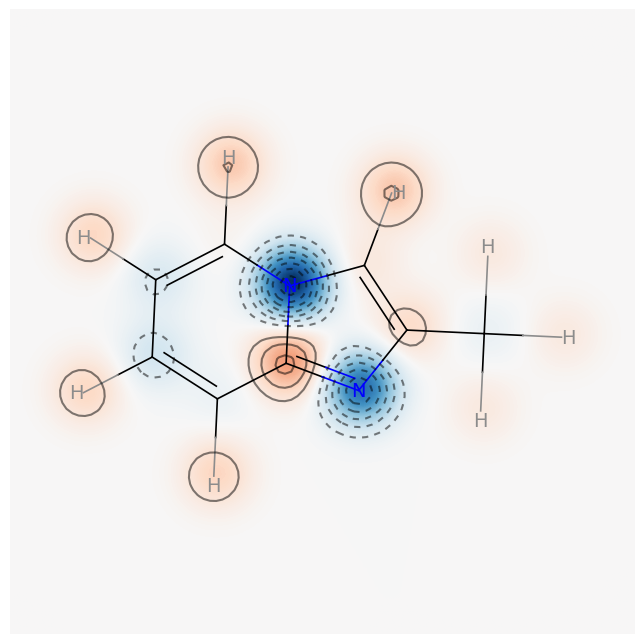

In [108]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from IPython.display import display
from rdkit.Chem.Draw import SimilarityMaps

def show_gasteiger(mol):
    mol = AllChem.AddHs(mol)
    AllChem.ComputeGasteigerCharges(mol)
    contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
    fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='RdBu_r', contourLines=10)
    return fig

mol = Chem.MolFromSmiles('Cc1cn2ccccc2n1')
show_gasteiger(mol)
None

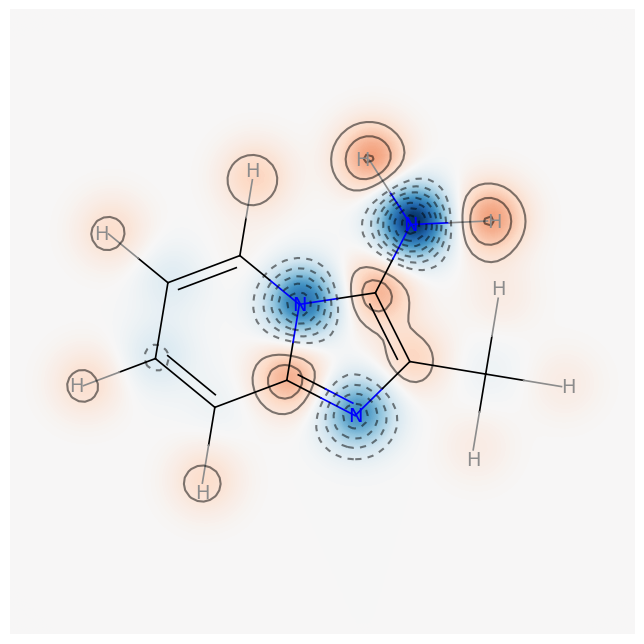

In [127]:
mol = Chem.MolFromSmiles('Cc1c(N)n2ccccc2n1')
show_gasteiger(mol)
None

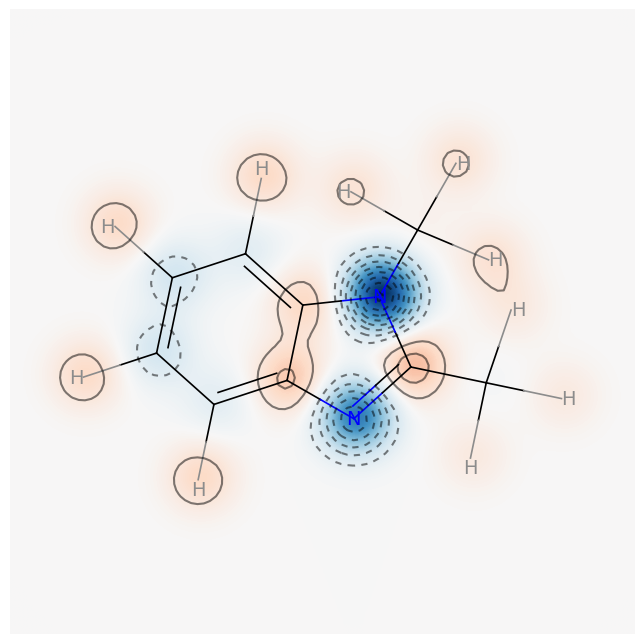

In [124]:
mol = Chem.MolFromSmiles('Cc1[nH0](C)c2ccccc2n1')
show_gasteiger(mol)
None

In [64]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from IPython.display import display

meta = pd.read_csv('../A71EV2A/metadata.csv')
meta['mol'] = meta.Smiles.apply(Chem.MolFromSmiles)

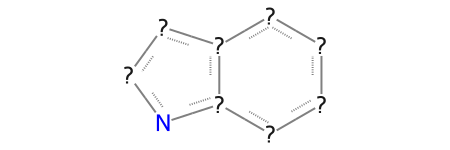

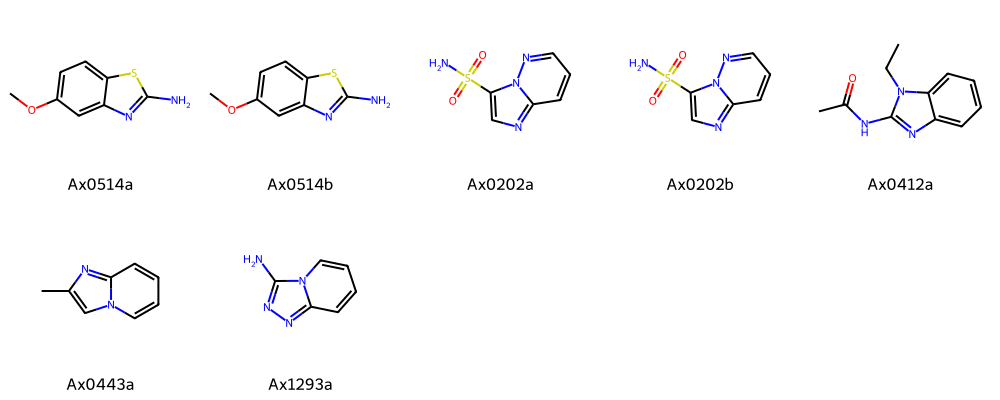

In [100]:
query = Chem.MolFromSmarts('a1[nH0X2]a(aaaa2)a2a1')
display(query)
sub = meta.loc[meta.mol.apply(lambda mol: mol.HasSubstructMatch(query))]
Draw.MolsToGridImage(sub.mol.to_list(), legends=sub.Code.to_list(), molsPerRow=5)

In [66]:
from pathlib import Path

for line in Path('/Users/user/Coding/ASAP/EV-A71-2A-protease/repo/iteration-2/misc/x0310_relaxed.pdb').read_text().split('\n'):
    if 'ATOM' not in line or 'SER' not in line or 'OG' not in line or '105' not in line:
        continue
    print(line)

ATOM   1050  OG  SER A  75       0.110  -3.295  13.093  1.00 22.03           O  
ATOM   1525  OG  SER A 105       9.267   6.330  23.303  1.00 17.49           O  


In [12]:
from rdkit import Geometry

og = Geometry.Point3D(9.267,6.330,23.303)

In [54]:
with Chem.SDMolSupplier('../A71EV2A/A71EV2A_combined.sdf') as sdfh:
    hits = list(sdfh)

In [59]:
sub = meta.loc[meta.mol.apply(lambda mol: mol.HasSubstructMatch(query))]
for hit in hits:
    if not hit.HasSubstructMatch(query):
        continue
    n_idx = hit.GetSubstructMatch(query)[1]
    n = hit.GetConformer().GetAtomPosition(n_idx)
    name = hit.GetProp('_Name')
    print(name, n.Distance(og), name in sub['Long code'].to_list())

A71EV2A-x0514_B_151_1_A71EV2A-x0526+A+147+1 8.456751917846473 True
A71EV2A-x0514_A_250_1_A71EV2A-x0528+A+201+1 21.817670773939184 True
A71EV2A-x0202_A_147_1_A71EV2A-x0395+A+148+1 12.887449708922244 True
A71EV2A-x0202_A_201_1_A71EV2A-x0488+A+147+1 15.565537864140769 True
A71EV2A-x0412_A_147_1_A71EV2A-x0211+A+302+1 23.335123612271694 True
A71EV2A-x0443_A_250_1_A71EV2A-x0526+A+147+1 3.818256277412503 True
A71EV2A-x1293_A_151_1_A71EV2A-x0395+A+148+1 11.737125585082577 True


In [60]:
for hit in hits:
    name = hit.GetProp('_Name')
    conf = hit.GetConformer()
    for atom in hit.GetAtoms():
        d = conf.GetAtomPosition(atom.GetIdx()).Distance(og)
        if d < 4:
            break
    else:
        continue
    print(name, atom.GetSymbol(), d)

A71EV2A-x0556_A_147_1_A71EV2A-x0526+A+147+1 N 3.8916621127739233
A71EV2A-x0450_A_201_1_A71EV2A-x0526+A+147+1 F 3.5833376899198317
A71EV2A-x0451_A_201_1_A71EV2A-x0526+A+147+1 N 3.789797619926426
A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 C 3.2475606229907403
A71EV2A-x0501_A_151_1_A71EV2A-x0526+A+147+1 C 2.382861095406108
A71EV2A-x0501_A_152_1_A71EV2A-x0526+A+147+1 C 2.592760305157421
A71EV2A-x0514_B_151_1_A71EV2A-x0526+A+147+1 C 2.9237780353508374
A71EV2A-x0515_A_201_1_A71EV2A-x0526+A+147+1 O 3.202137098876311
A71EV2A-x0528_A_147_1_A71EV2A-x0526+A+147+1 F 2.9680016846356407
A71EV2A-x0554_A_201_1_A71EV2A-x0526+A+147+1 C 3.1827689202956586
A71EV2A-x0310_A_147_1_A71EV2A-x0526+A+147+1 C 3.5956799078894663
A71EV2A-x0207_A_151_1_A71EV2A-x0526+A+147+1 C 3.756038072224508
A71EV2A-x0237_A_151_1_A71EV2A-x0526+A+147+1 N 3.888188652830517
A71EV2A-x0351_A_301_1_A71EV2A-x0526+A+147+1 C 3.4938520289216606
A71EV2A-x0365_A_201_1_A71EV2A-x0526+A+147+1 C 2.615221596729424
A71EV2A-x0375_A_301_1_A71EV2A-x0

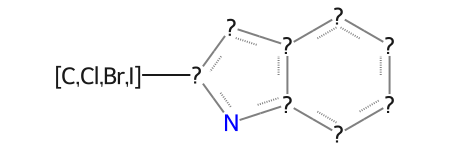

7


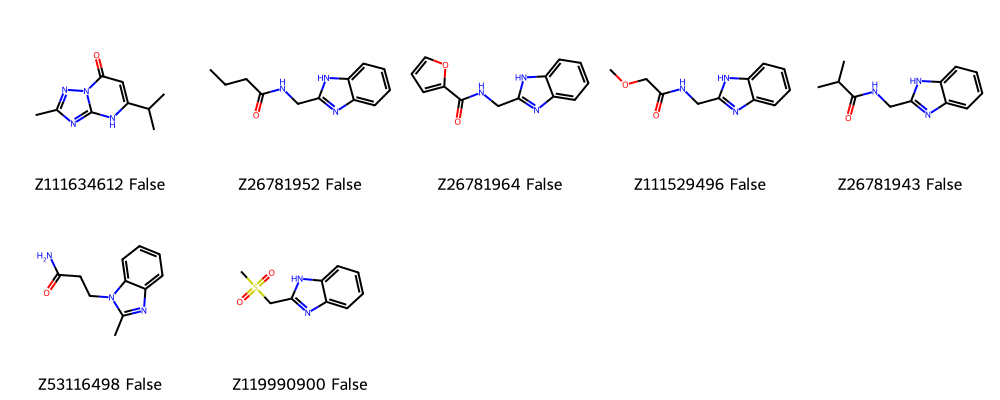

In [73]:
poised = pd.read_csv(Path('~/Coding/library_exploration/annotated_poised.csv').expanduser())
poised['mol'] = poised.SMILES.apply(Chem.MolFromSmiles)
poised['Code'] = poised['Catalog ID'] 

#query = Chem.MolFromSmarts('a1[nH0X2]a(aaaa2)a2a1')
query = Chem.MolFromSmarts('[C,Cl,Br,I]-a1[nH0X2]a(aaaa2)a2a1')
display(query)
sub = poised.loc[poised.mol.apply(lambda mol: mol.HasSubstructMatch(query))]
print(len(sub))
Draw.MolsToGridImage(sub.mol.to_list(), legends=(sub.Code + ' ' + (sub.Code.isin(meta.Code.to_list())).astype(str)).to_list(), molsPerRow=5)

In [74]:
Z111634612	Cc1nc2[nH]c(C(C)C)cc(=O)n2n1
Z53116498  Cc1nc2ccccc2n1CCC(N)=O

,Unnamed: 0,Catalog ID,SMILES,total,class,is_original,MW,NumHeavyAtoms,CLogP,HBD,...,TBXTA,XX02KALRNA,DCP2B,Mpro,HAO1A,NUDT5A,STAG1A,smTGRNEW,mol,Code
7,7,Z111634612,Cc1nc2[nH]c(C(C)C)cc(=O)n2n1,0,blow-in,False,192.218,14,-0.394,1,...,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x178647290>,Z111634612
67,67,Z26781952,CCCC(=O)NCc1nc2ccccc2[nH]1,4,hitter,True,217.267,16,1.431,2,...,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x1786457e0>,Z26781952
91,91,Z26781964,O=C(NCc1nc2ccccc2[nH]1)c1ccco1,3,hitter,True,241.245,18,1.428,2,...,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x178644c80>,Z26781964
256,256,Z111529496,COCC(=O)NCc1nc2ccccc2[nH]1,0,ligaint,True,219.240,16,0.404,2,...,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x178640ac0>,Z111529496
640,640,Z26781943,CC(C)C(=O)NCc1nc2ccccc2[nH]1,2,hitter,True,217.267,16,1.211,2,...,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x17862dd90>,Z26781943
793,793,Z53116498,Cc1nc2ccccc2n1CCC(N)=O,3,hitter,True,203.240,15,0.750,1,...,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x178636260>,Z53116498
827,827,Z119990900,CS(=O)(=O)Cc1nc2ccccc2[nH]1,9,slugger,True,210.253,14,-0.307,1,...,0,0,0,1,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x178635310>,Z119990900


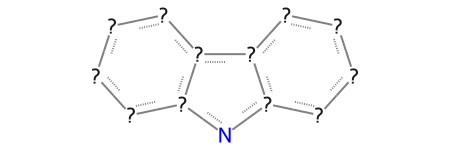

In [75]:
Chem.MolFromSmarts('a12aaaaa1a3a(aaaa3)[nH0X2]2')

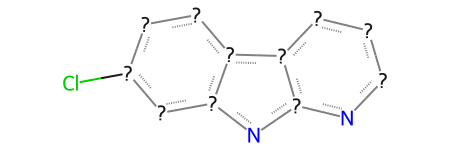

In [84]:
Chem.MolFromSmarts('a12naaaa1a3a(aa(-[Cl])aa3)[nH0X2]2')

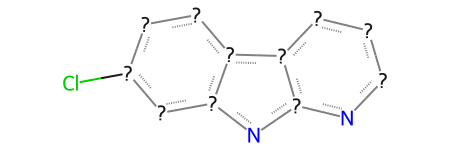

In [87]:
Chem.MolFromSmarts('a12naaaa1a3a(aa(-[Cl])aa3)[nH0X2]2')

In [86]:
!ls /Users/user/Coding/ASAP/EV-A71-2A-protease/repo/iteration-2/misc/x0310_relaxed.pdb

A71-Fragmenstein-iter2-hybrid.Michelanglo.json
LIG.params
hits.plk.gz
x0310_raw.pdb
x0310_relaxed.pdb


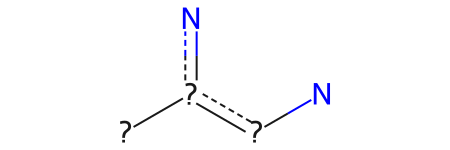

In [95]:
Chem.MolFromSmarts('N-a:a(-[Cl,F,Br,$(C(F)(F)F),$([CH1](F)F),$([CH2]F),CH3]):[nH0X2]')

In [126]:
!python /Users/user/Coding/Fragment-hit-follow-chemistry/fragment_elaboration_scripts/pyrosetta_min.py \
-t /Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/x310-clean.pdb \
-o /Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb \
-w 20 -c 5 \
--ignore_unrecognized_res 1 \
--relax_to_start_coords 1 \
--single_chain 1

chains map_unsigned_long_char{1: A}
sequence SGAIYVGNYRVVNRHLATHNDWANLVWEDSSRDLLVSSTTAQGCDTIARCDCQTGVYYCSSRRKHYPVSFSKPSLIFVEASEYYPARYQSHLMLAVGHSEPGDCGGILRCQHGVVGIVSTGGNGLVGFADVRDLLWLDEE
Constraints present []
0.8630971238207961


In [85]:
from fragmenstein import Victor, Igor, Monster

Igor.init_pyrosetta()

PyRosetta-4 2023 [Rosetta PyRosetta4.Release.python310.m1 2023.16+release.942c01d5066fd96860b7d268702b832fe906a739 2023-04-12T15:05:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [139]:
from collections import defaultdict
import re


hitdex = defaultdict(list)

for hit in hits:
    name = re.match(r'\w+-(x\d+)', hit.GetProp('_Name')).group(1)
    hitdex[name].append(hit)

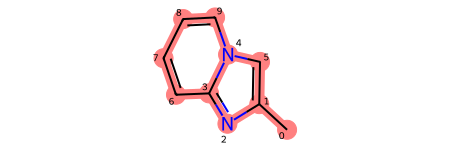

In [156]:
x0443 = hitdex['x0443'][0]
x0443.SetProp('_Name', 'x0443')
x0443

In [170]:
results = []

In [171]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place(Chem.MolToSmiles(x0443), long_name='Z82176792')
results.append({'mol': vicky.minimized_mol, 'test': 'self', **vicky.summarize()})

Z82176792 - Folder output/Z82176792 exists.


In [172]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cc1nc2[nH]c(C(C)C)cc(=O)n2n1', long_name='Z111634612')
results.append({'mol': vicky.minimized_mol, 'test': 'negative library', **vicky.summarize()})

Z111634612 - Folder output/Z111634612 exists.


In [173]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cc1nc2ccccc2n1CCC(N)=O', custom_map={'x0443': {2: 2}}, long_name='Z53116498')
results.append({'mol': vicky.minimized_mol, 'test': 'negative library', **vicky.summarize()})

Z53116498 - Folder output/Z53116498 exists.


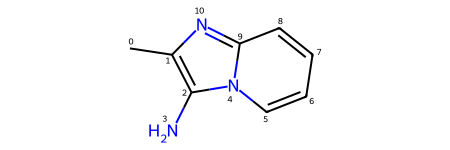

In [175]:
Chem.MolFromSmiles('CC1=C(N)N(C=CC=C2)C2=N1')

In [181]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('CC1=C(N)N(C=CC=C2)C2=N1', long_name='EN300-1253233')
results.append({'mol': vicky.minimized_mol, 'test': 'amino version of x0443', **vicky.summarize()})

EN300-1253233 - Folder output/EN300-1253233 exists.


In [330]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('NC1=C(Br)N=C2C=CC=CN12', long_name='CSCS00010336593')
results.append({'mol': vicky.minimized_mol, 'test': 'amino+Br version of x0443', **vicky.summarize()})

CSCS00010336593 - Folder output/CSCS00010336593 exists.


In [333]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('NC1=C(Cl)N=C2C=CC=CN12', long_name='CSCS00009962897')
results.append({'mol': vicky.minimized_mol, 'test': 'amino+Cl version of x0443', **vicky.summarize()})

In [329]:
for i, row in enumerate(results):
    if row['name'] == 'CSCS00010336593':
        break
del results[i]

In [328]:
row['name']

'CSCS00010336593'

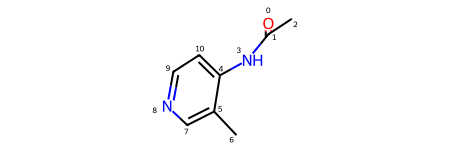

In [192]:
x0487 = hitdex['x0487'][0]
x0487.SetProp('_Name', 'x0487')
x0487

In [194]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place(Chem.MolToSmiles(x0487), long_name='Z1148747945')
results.append({'mol': vicky.minimized_mol, 'test': 'self', **vicky.summarize()})

In [195]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Nc1ccncc1C', long_name='EN300-67367')
results.append({'mol': vicky.minimized_mol, 'test': 'stripped down x0487', **vicky.summarize()})

In [204]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Nc1cccnc1Br', long_name='EN300-109181', custom_map={'x0487': {7: 5}})
results.append({'mol': vicky.minimized_mol, 'test': 'pyridine version of x0487', **vicky.summarize()})

EN300-109181 - Folder output/EN300-109181 exists.


In [206]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Nc1cccnc1[Cl]', long_name='EN300-19839', custom_map={'x0487': {7: 5}})
results.append({'mol': vicky.minimized_mol, 'test': 'pyridine version of x0487', **vicky.summarize()})

In [209]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Nc1cccnc1C', long_name='EN300-84026', custom_map={'x0487': {7: 5}})
results.append({'mol': vicky.minimized_mol, 'test': 'pyridine version of x0487', **vicky.summarize()})

In [210]:
IPythonConsole.drawOptions.addAtomIndices = True

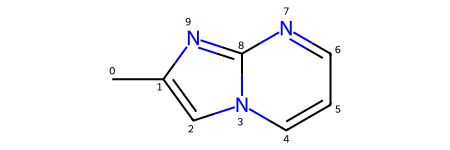

In [245]:
Chem.MolFromSmiles('Cc1cn2cccnc2n1')

In [232]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cc1nc2ccccc2n1C', custom_map={'x0443': {2: 2}}, long_name='N-meythlimidazolobenzene')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

In [233]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cn1[nH0]c2ccccc2c1C', custom_map={'x0443': {2: 2}}, long_name='N-meythlpyazolobenzene')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

In [285]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cn1[nH0]c2ccccc2c1N', custom_map={'x0443': {2: 2}}, long_name='amino-N-meythlpyazolobenzene')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

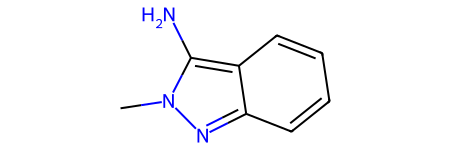

In [284]:
Chem.MolFromSmiles('Cn1[nH0]c2ccccc2c1N')

In [279]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cn1[nH0]c2ncccc2c1C', custom_map={'x0443': {2: 2}}, long_name='N-meythlpyazolopyrdine')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

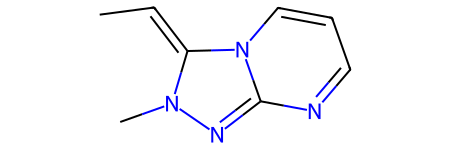

In [320]:
Chem.MolFromSmiles('CN1[NH0]=C2N=CC=CN2C1=C-C')

In [ ]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cn1[nH0]c2ncccc2c1C', custom_map={'x0443': {2: 2}}, long_name='N-meythltriazolopyrdine')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

In [246]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cc1cn2cccnc2n1', custom_map={'x0443': {2: 9}}, long_name='imidazolopyrimidine')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

In [272]:
IPythonConsole.drawOptions.addAtomIndices = True
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cc1c(C)n2cccnc2n1', custom_map={'x0443': {2: 10}}, long_name='C-methylimidazolopyrimidine')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

In [292]:
vicky = Victor([x0443], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cn1[nH0]c2ccccc2c1CC(=O)O', custom_map={'x0443': {2: 2}}, long_name='N-acetic-pyazolobenzene')
results.append({'mol': vicky.minimized_mol, 'test': 'x0443 alt', **vicky.summarize()})

N-acetic-pyazolobenzene - Folder output/N-acetic-pyazolobenzene exists.


In [363]:
df = pd.DataFrame(results).sort_values('∆∆G').set_index('name')
df

,mol,test,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,runtime,regarded,disregarded
name,,,,,,,,,,,,,,
Z1148747945,<rdkit.Chem.rdchem.Mol object at 0x307445030>,self,CC(=O)Nc1ccncc1C,,expansion,-9.217557,-9.248769,-0.031212,0.208438,11,0,6.931657,[x0487],[]
N-meythlpyazolobenzene,<rdkit.Chem.rdchem.Mol object at 0x30745f8d0>,x0443 alt,Cn1[nH0]c2ccccc2c1C,,expansion,-7.952512,-8.025968,-0.073456,0.297927,10,1,4.855429,[x0443],[]
N-meythlimidazolobenzene,<rdkit.Chem.rdchem.Mol object at 0x307446430>,x0443 alt,Cc1nc2ccccc2n1C,,expansion,-6.974822,-7.031686,-0.056865,0.344436,10,1,4.817168,[x0443],[]
EN300-67367,<rdkit.Chem.rdchem.Mol object at 0x307494d10>,stripped down x0487,Nc1ccncc1C,,expansion,-6.861422,-6.833204,0.028218,0.322685,8,0,5.231080,[x0487],[]
N-meythlpyazolopyrdine,<rdkit.Chem.rdchem.Mol object at 0x30747ca90>,x0443 alt,Cn1[nH0]c2ncccc2c1C,,expansion,-6.842405,-6.859947,-0.017543,1.526079,10,1,4.899374,[x0443],[]
Z2227587091,<rdkit.Chem.rdchem.Mol object at 0x308bd7010>,x0365 morpholino,C2C(CC(NC1=NN(C)C(C)=N1)=O)CCOC2,,expansion,-6.815875,-6.215361,0.600514,0.804584,13,4,6.797622,"[x0365S1, x0365S2]",[]
Z1524920623,<rdkit.Chem.rdchem.Mol object at 0x306f53e20>,x0365 morpholino,C2C(CC(NC1=NN(C)C(Br)=C1)=O)CCOC2,,expansion,-6.574991,-6.032003,0.542988,0.575318,14,3,6.695004,"[x0365S1, x0365S2]",[]
amino-N-meythlpyazolobenzene,<rdkit.Chem.rdchem.Mol object at 0x30729e930>,x0443 alt,Cn1[nH0]c2ccccc2c1N,,expansion,-6.560790,-6.508736,0.052054,0.311533,10,1,4.758834,[x0443],[]
Z1584103330,<rdkit.Chem.rdchem.Mol object at 0x308c79260>,x0365 morpholino,C2N(CC(NC1=NN(C)C(Br)=C1)=O)CCOC2,,expansion,-6.415434,-5.538291,0.877144,0.504391,14,3,11.089946,"[x0365S1, x0365S2]",[]


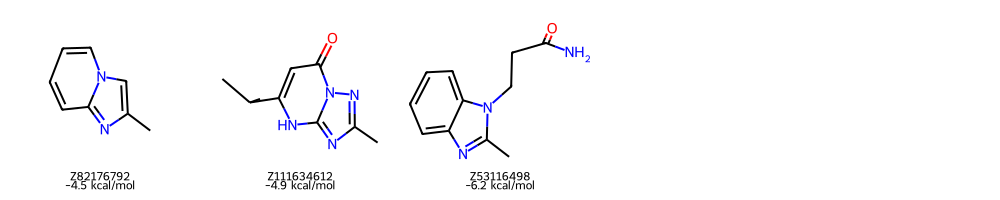

In [295]:
sub = df.loc[['Z82176792', 'Z111634612', 'Z53116498']]
IPythonConsole.drawOptions.addAtomIndices = False
Draw.MolsToGridImage(sub.mol.apply(AllChem.RemoveAllHs).to_list(),
                     legends=(sub.index.to_series() + '\n' + sub['∆∆G'].round(1).apply('{} kcal/mol'.format)).to_list(),
                    molsPerRow=5)

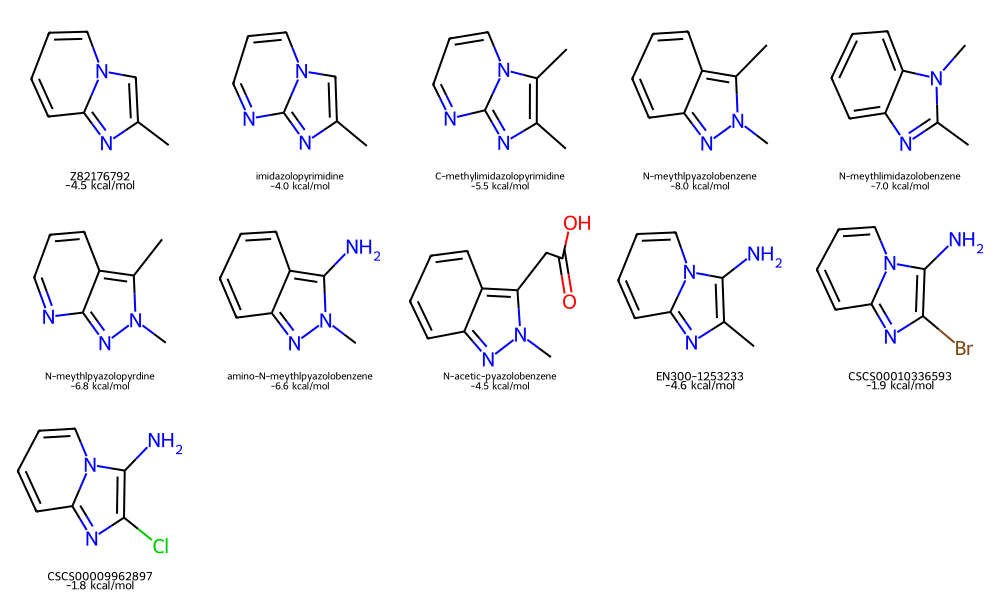

In [335]:
sub = df.loc[['Z82176792', 'imidazolopyrimidine', 'C-methylimidazolopyrimidine', 'N-meythlpyazolobenzene', 'N-meythlimidazolobenzene', 
              'N-meythlpyazolopyrdine', 'amino-N-meythlpyazolobenzene', 'N-acetic-pyazolobenzene', 'EN300-1253233', 'CSCS00010336593', 'CSCS00009962897']]
IPythonConsole.drawOptions.addAtomIndices = False
Draw.MolsToGridImage(sub.mol.apply(AllChem.RemoveAllHs).to_list(),
                     legends=(sub.index.to_series() + '\n' + sub['∆∆G'].round(1).apply('{} kcal/mol'.format)).to_list(),
                    molsPerRow=5)

In [ ]:
| CSCS00009962897 | 
| CSCS00010336593 |

[14:23:51] Molecule does not have explicit Hs. Consider calling AddHs()
[14:23:51] Molecule does not have explicit Hs. Consider calling AddHs()


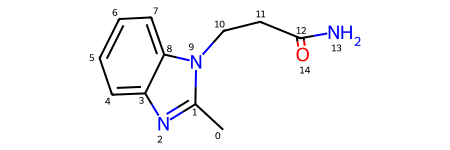

In [158]:
monstah = Monster([x0443])
monstah.place_smiles('Cc1nc2ccccc2n1CCC(N)=O', custom_map={'x0443': {2: 2}})
monstah.positioned_mol

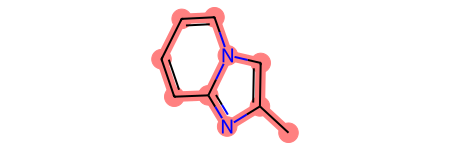

In [147]:
x0443

In [ ]:
Z111634612	Cc1nc2[nH]c(C(C)C)cc(=O)n2n1
Z53116498  Cc1nc2ccccc2n1CCC(N)=O

In [302]:
mol = hitdex['x0922'][0]
for code in ('x0926', 'x1019', 'x1140'):
    mol = Chem.CombineMols(mol, hitdex[code][0])
Chem.MolToMolFile(mol, 'test.mol')

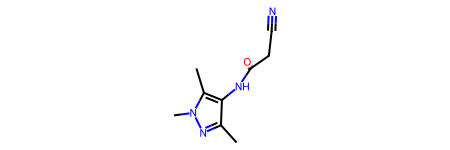

In [322]:
hitdex['x0310'][0]

In [340]:
from arthorian_quest import enquire

IPythonConsole.drawOptions.addAtomIndices = True
Chem.MolToSmarts(enquire(hitdex['x0365'][0], {1: '[n,c]', 5: '[aX3H0]'}, generic_arocarbons=True))

'[C&H3]-[n,c]1:[n&H0]:[a&H0](:[a&H0&X2,a&H1&X3]:[a&X3&H0]:1)-[N&H1]-[C&H2]-[a&H0]1:[a&H0&X2,a&H1&X3]:[a&H0&X2,a&H1&X3]:[a&H0&X2,a&H1&X3]:[a&H0&X2,a&H1&X3]:[a&H0&X2,a&H1&X3]:1'

In [342]:
x0365 = hitdex['x0365'][0]
x0365.SetProp('_Name', 'x0365')

In [344]:
vicky = Victor([x0365], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('C2C(C(NC1=NN(C)C(C)=N1)=O)CCOC2', long_name='Z2227587622')
results.append({'mol': vicky.minimized_mol, 'test': 'x0365 morpholino', **vicky.summarize()})

Z2227587622 - Folder output/Z2227587622 exists.


In [346]:
vicky = Victor([x0365], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('C2C(CC(NC1=NN(C)C(C)=N1)=O)CCOC2', long_name='Z2227587091')
results.append({'mol': vicky.minimized_mol, 'test': 'x0365 morpholino', **vicky.summarize()})

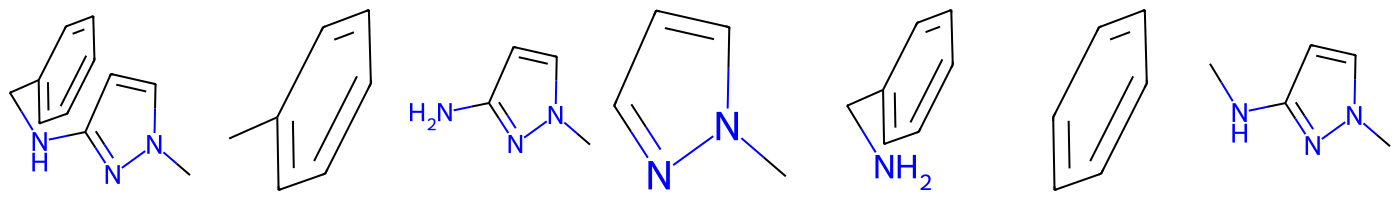

In [353]:
from gist_import import GistImporter
from types import ModuleType
from typing import List
from rdkit import Chem

url = 'https://raw.githubusercontent.com/matteoferla/Fragment-hit-follow-up-chemistry/main/fragment_elaboration_scripts/fragment.py'
frag: ModuleType = GistImporter.from_github(url).to_module()
x0365s: List[Chem.Mol] = frag.fragment(x0365)
Draw.MolsToImage(x0365s)

In [355]:
vicky = Victor(x0365s[1:3], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('C2C(CC(NC1=NN(C)C(C)=N1)=O)CCOC2', long_name='Z2227587091')
results.append({'mol': vicky.minimized_mol, 'test': 'x0365 morpholino', **vicky.summarize()})

Z2227587091 - Folder output/Z2227587091 exists.


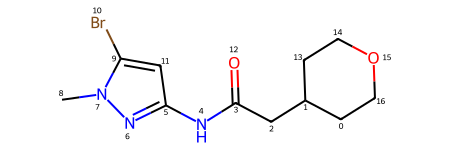

In [358]:
Chem.MolFromSmiles('C2C(CC(NC1=NN(C)C(Br)=C1)=O)CCOC2')

In [356]:

vicky = Victor(x0365s[1:3], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('C2C(CC(NC1=NN(C)C(Br)=C1)=O)CCOC2', long_name='Z1524920623')
results.append({'mol': vicky.minimized_mol, 'test': 'x0365 morpholino', **vicky.summarize()})

In [359]:
vicky = Victor(x0365s[1:3], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('C2N(CC(NC1=NN(C)C(Br)=C1)=O)CCOC2', long_name='Z1584103330')
results.append({'mol': vicky.minimized_mol, 'test': 'x0365 morpholino', **vicky.summarize()})

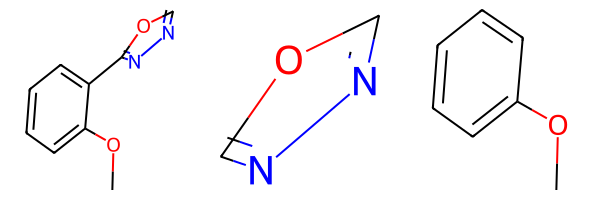

In [360]:
x0501 = hitdex['x0501'][0]
x0501.SetProp('_Name', 'x0501')

x0501s: List[Chem.Mol] = frag.fragment(x0501)
Draw.MolsToImage(x0501s)

In [361]:
vicky = Victor([x0365s[2], x0501s[1]], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cn1nc(N)cc1-c1ncno1', long_name='BBV-112775210')
results.append({'mol': vicky.minimized_mol, 'test': 'x0501 oxadiazole', **vicky.summarize()})

In [364]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cc1cnccc1N', long_name='EN300-67367')
results.append({'mol': vicky.minimized_mol, 'test': 'x0487 variant', **vicky.summarize()})

EN300-67367 - Folder output/EN300-67367 exists.


In [365]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Cc1ncncc1N', long_name='EN300-221558')
results.append({'mol': vicky.minimized_mol, 'test': 'x0487 variant', **vicky.summarize()})

In [370]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Nc1ccncc1Cl', long_name='EN300-05222')
results.append({'mol': vicky.minimized_mol, 'test': 'x0487 variant', **vicky.summarize()})

In [371]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('Nc1ccncc1Br', long_name='EN300-81773')
results.append({'mol': vicky.minimized_mol, 'test': 'x0487 variant', **vicky.summarize()})

In [381]:
df = pd.DataFrame(results).sort_values('∆∆G').set_index('name')
df

,mol,test,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,runtime,regarded,disregarded
name,,,,,,,,,,,,,,
Z1148747945,<rdkit.Chem.rdchem.Mol object at 0x307445030>,self,CC(=O)Nc1ccncc1C,,expansion,-9.217557,-9.248769,-0.031212,0.208438,11,0,6.931657,[x0487],[]
N-meythlpyazolobenzene,<rdkit.Chem.rdchem.Mol object at 0x30745f8d0>,x0443 alt,Cn1[nH0]c2ccccc2c1C,,expansion,-7.952512,-8.025968,-0.073456,0.297927,10,1,4.855429,[x0443],[]
N-meythlimidazolobenzene,<rdkit.Chem.rdchem.Mol object at 0x307446430>,x0443 alt,Cc1nc2ccccc2n1C,,expansion,-6.974822,-7.031686,-0.056865,0.344436,10,1,4.817168,[x0443],[]
EN300-67367,<rdkit.Chem.rdchem.Mol object at 0x307494d10>,stripped down x0487,Nc1ccncc1C,,expansion,-6.861422,-6.833204,0.028218,0.322685,8,0,5.231080,[x0487],[]
N-meythlpyazolopyrdine,<rdkit.Chem.rdchem.Mol object at 0x30747ca90>,x0443 alt,Cn1[nH0]c2ncccc2c1C,,expansion,-6.842405,-6.859947,-0.017543,1.526079,10,1,4.899374,[x0443],[]
Z2227587091,<rdkit.Chem.rdchem.Mol object at 0x308bd7010>,x0365 morpholino,C2C(CC(NC1=NN(C)C(C)=N1)=O)CCOC2,,expansion,-6.815875,-6.215361,0.600514,0.804584,13,4,6.797622,"[x0365S1, x0365S2]",[]
Z2912141468,<rdkit.Chem.rdchem.Mol object at 0x306f53060>,self,CC1=NN(C)C(C)=C1CC(=O)NC(CO)C1=CC=CN=C1,,expansion,-6.815827,-5.515080,1.300747,0.788948,21,0,7.187623,[x1346],[]
EN300-67367,<rdkit.Chem.rdchem.Mol object at 0x3085798f0>,x0487 variant,Cc1cnccc1N,,expansion,-6.596981,-6.568763,0.028218,0.274675,8,0,5.486259,[x0487],[]
Z1524920623,<rdkit.Chem.rdchem.Mol object at 0x306f53e20>,x0365 morpholino,C2C(CC(NC1=NN(C)C(Br)=C1)=O)CCOC2,,expansion,-6.574991,-6.032003,0.542988,0.575318,14,3,6.695004,"[x0365S1, x0365S2]",[]


In [ ]:
Cc1nc2[nH]c(C)cc(=O)n2n1 MCULE-7040992236

In [ ]:
vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place(Chem.MolToSmiles(x0487), long_name='Z1148747945')
results.append({'mol': vicky.minimized_mol, 'test': 'self', **vicky.summarize()})

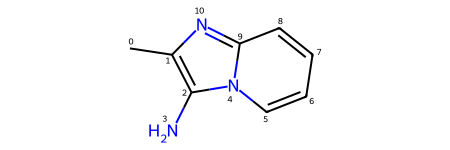

In [375]:
Chem.MolFromSmiles('CC1=C(N)N(C=CC=C2)C2=N1')

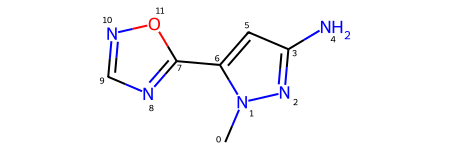

In [379]:
Chem.MolFromSmiles('Cn1nc(N)cc1-c1ncno1')

In [377]:
Chem.MolToSmiles(hitdex['x1346'][0])

'Cc1nn(C)c(C)c1CC(=O)N[C@@H](CNC(=O)CCl)c1ccc2ccccc2c1'

In [380]:
x1346 = hitdex['x1346'][0]
x1346.SetProp('_Name', 'x1346')
vicky = Victor([x1346], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place('CC1=NN(C)C(C)=C1CC(=O)NC(CO)C1=CC=CN=C1', long_name='Z2912141468')
results.append({'mol': vicky.minimized_mol, 'test': 'self', **vicky.summarize()})

In [459]:
chosen_smiles = {
    "EN300-67367": "Cc1ncncc1N",
    "EN300-1253233": "CC1=C(N)N(C=CC=C2)C2=N1",
    "EN300-14984": "Cc1cc(N)n(C)n1",
    "EN300-25403": "Cc1nn(C)c(C)c1CC(=O)O",
    "Z1584103330": "C2N(CC(NC1=NN(C)C(Br)=C1)=O)CCOC2",
    "Z2912141468": "CC1=NN(C)C(C)=C1CC(=O)NC(CO)C1=CC=CN=C1",
    "MCULE-9265204962": "Cc1ncncc1CN",
    "EN300-221558": "Cc1ncncc1N",
    "EN300-81773": "Nc1ccncc1Br",
    "EN300-05222": "Nc1ccncc1Cl",
    "EN300-754534": "Cc1nc2ccccn2c1CN",
    "MCULE-1196506336": "NC1N2C(N=CC=C2)=NC=1C",
    "CSCS00009962897": "NC1=C(Cl)N=C2C=CC=CN12",
    "EN300-27778965": "Cn1nc2ccccc2c1N",
    "EN300-204033": "Cc1cc(CN)n(C)n1",
    "CSC015535643": "CNc1cc(N)n(C)n1",
    "EN300-155587": "Cc1nn(C)cc1N",
    "CSC015835723": "Cc1cnc(CC(=O)O)cc1N",
    "EN300-6250895": "Cn1ncc(CC(=O)O)c1Br",
    "CSC016220088": "Cn1ncc(CC(=O)O)c1N",
    "Z2227587622": "C2C(C(NC1=NN(C)C(C)=N1)=O)CCOC2",
    "BBV-112775210": "Cn1nc(N)cc1-c1ncno1",
}

In [460]:
for name, smiles in chosen_smiles.items():
    if name == 'xxx':
        break
    assert (Path('output') / name ).exists(), name

CSC015835723


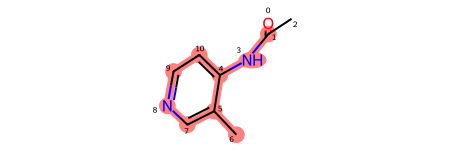

In [453]:
name = list(chosen_smiles)[15]
print(name)
smiles = chosen_smiles[name]

Chem.MolFromSmiles(smiles)

x0487

In [455]:
# x0487 x0443 x1346

vicky = Victor([x0487], pdb_filename='/Users/user/Coding/ASAP/EV-A71-2A-protease/iter3/Ax0310a_min2.pdb')
vicky.place(smiles, long_name=name, custom_map={x0487.GetProp('_Name'): {6: 0}})
results.append({'mol': vicky.minimized_mol, 'test': 'self', **vicky.summarize()})


CSC015835723 - Folder output/CSC015835723 exists.


In [456]:
from rdkit.Chem import PandasTools

In [461]:
df = pd.DataFrame(results).sort_values('∆∆G').drop_duplicates('name').set_index('name')
PandasTools.WriteSDF(
                     df.loc[chosen_smiles.keys()].reset_index(),
                     'S1_chosen.sdf',
                    'mol',
                        'name'
                    )

In [469]:
['EN300-67367',
 'EN300-1253233',
 'EN300-14984',
 'EN300-27778965']

['EN300-67367',
 'EN300-1253233',
 'EN300-14984',
 'EN300-25403',
 'Z1584103330',
 'Z2912141468',
 'MCULE-9265204962',
 'EN300-221558',
 'EN300-81773',
 'EN300-05222',
 'EN300-754534',
 'MCULE-1196506336',
 'CSCS00009962897',
 'EN300-27778965',
 'EN300-204033',
 'CSC015535643',
 'EN300-155587',
 'CSC015835723',
 'EN300-6250895',
 'CSC016220088',
 'Z2227587622',
 'BBV-112775210']

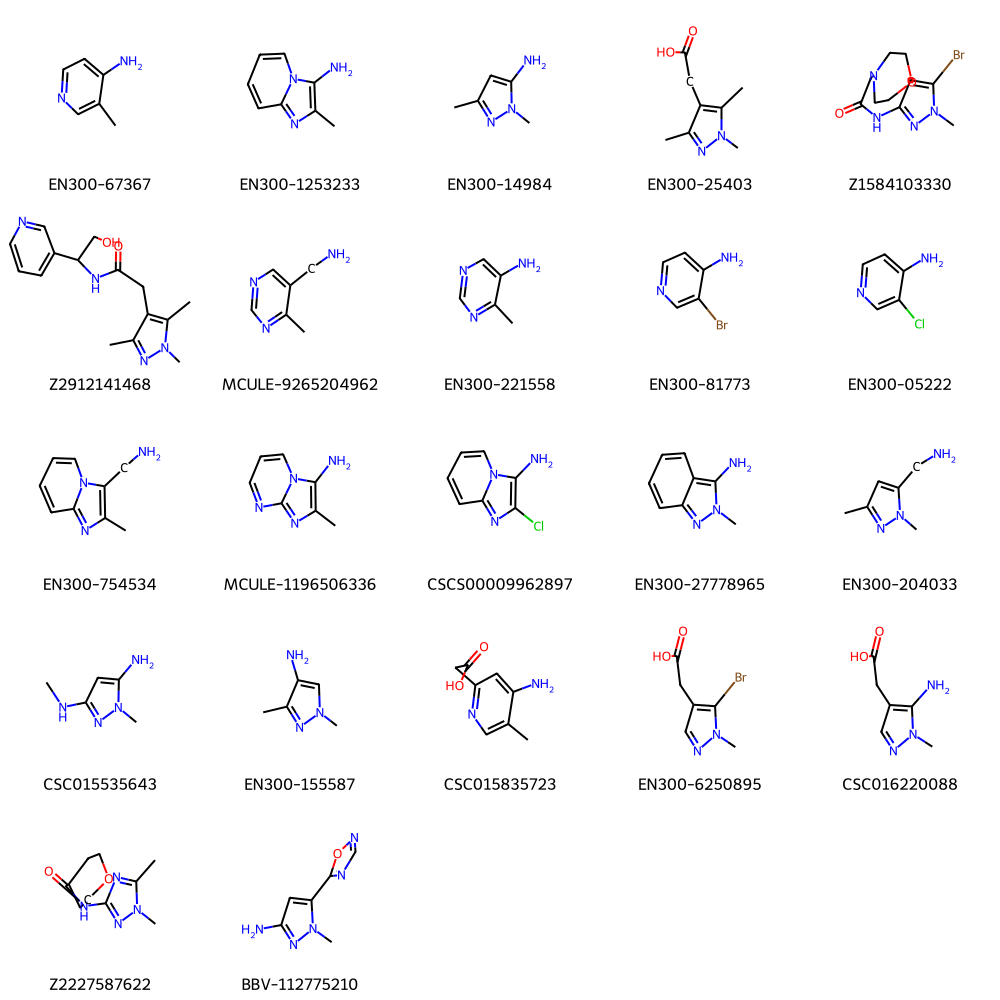

In [468]:
sub = df.loc[chosen_smiles.keys()]

IPythonConsole.drawOptions.addAtomIndices = False
Draw.MolsToGridImage(sub.mol.apply(AllChem.RemoveAllHs), legends=sub.index.to_list(), molsPerRow=5)

In [443]:
MCULE-9265204962  {6: 0}

'MCULE-9265204962'

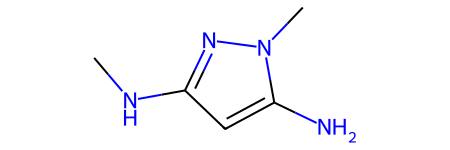

In [470]:
Chem.MolFromSmiles('CNc1cc(N)n(C)n1')